In [1]:
import cv2
import numpy as np
import face_recognition
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
data=pd.read_csv("datadetails.csv")
data.head(5)
row, col = data.shape
row

2

In [3]:
images=[]
for i in range(0,row):
    img_dir= str(data.iloc[i,1])
    print(img_dir)
    train_image=cv2.imread(img_dir)
    images.append(train_image)

/home/ran/Desktop/Kaldi AIMS Lab/FaceRecognition/database/1.jpg
/home/ran/Desktop/Kaldi AIMS Lab/FaceRecognition/database/2.jpg


In [4]:
def findencodings(images):
    encodeList=[]
    for img in images:
        train_image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        encode_train=face_recognition.face_encodings(train_image)[0]
        encodeList.append(encode_train)
    return encodeList   

In [5]:
encodeListKnown=findencodings(images)
joblib.dump(encodeListKnown, 'filename.pkl') 
clf = joblib.load('filename.pkl') 

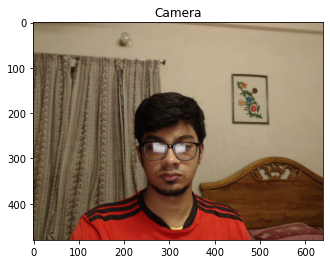

True

In [6]:
cam = cv2.VideoCapture(0)

if cam.isOpened():
    ret,frame = cam.read()
    #print(ret)
    #print(frame)
else:
    ret=False

test_image= cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.title("Camera")
plt.imshow(test_image)
plt.show()
cam.release()
cv2.imwrite("test_image.jpg", frame)

In [7]:
facesCurFrame=face_recognition.face_locations(test_image)
encodeCurFrame= face_recognition.face_encodings(test_image,facesCurFrame)
for encodeFace, facLoc in zip(encodeCurFrame, facesCurFrame):
    matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
    faceDis= face_recognition.face_distance(encodeListKnown, encodeFace)
    print(faceDis)
    matcheIndex= np.argmin(faceDis)
    print(matcheIndex)
    name = str(data.iloc[matcheIndex,2])
    print(name)


[0.79684845 0.18712982]
1
nabid
